In [1]:
from data import load_data
from plotting import hist_plot,time_series_plot,corr_heatmap,sort_corr
from preprocessing import convert_datetime,remove_filers_with_boxplot
from feature_selection import lasso_features_selection

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)
plt.rcParams['axes.unicode_minus']=False


### Data loading

In [2]:
# Load the raw dataset, which is a gold price prediction dataset I downloaded from Kaggle
data_path="./data/FINAL_USO.csv"
data=load_data(data_path)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.3018,1.2982,1.3051,1.2957,1,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,0,53604,54248,54248,52316,119440,1,1.911,1.911,1.911,1.911,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.70,615.00,614.60,1,1425,80.341,80.565,80.630,80.130,22850,0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.3035,1.3020,1.3087,1.2997,1,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,1,53458,53650,54030,52890,65390,0,1.851,1.851,1.851,1.851,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.60,623.45,622.30,1,1400,80.249,80.175,80.395,79.935,13150,0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,1.2995,1.3043,1.3044,1.2981,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,1,52961,53400,53400,52544,67280,0,1.810,1.810,1.810,1.810,0,1411.10,1422.65,1427.60,1404.60,0,608.80,626.00,630.00,608.60,0,1400,80.207,80.300,80.470,80.125,970,0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,66.449997,68.099998,66.000000,67.000000,64.731514,875300,1.3079,1.3003,1.3133,1.2994,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,1,53487,52795,53575,52595,55130,1,1.927,1.927,1.927,1.927,1,1434.75,1408.95,1436.55,1408.15,1,626.65,622.45,622.45,622.45,1,1400,80.273,80.890,80.940,80.035,22950,1,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,67.099998,69.400002,66.900002,68.500000,66.180725,837600,1.3045,1.3079,1.3197,1.3024,0,107.71,107.15,108.17,106.16,145090,1,99.01,97.54,99.26,96.81,1,53148,53519,54184,52937,75950,0,1.970,1.970,1.970,1.970,1,1429.05,1434.40,1453.75,1417.65,0,635.90,625.70,641.50,623.80,1,1400,80.350,80.105,80.445,79.550,24140,1,53.150002,53.430000,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


### EDA

– Describe your data (e.g. dtypes, descriptive statistics)


In [3]:
print("data shape:",data.shape)

data shape: (1718, 81)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [5]:
# descriptive statistics
data.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,192.204570,1.098026e+08,18161.094398,18244.137842,18073.889095,18164.119043,18164.119043,1.779131e+08,28.276554,28.822555,27.653655,28.209302,27.783958,1.136074e+06,1.208494,1.208531,1.213360,1.203692,0.494761,77.504523,77.521740,78.384936,76.593894,225958.585565,0.498836,70.153097,70.275396,71.120256,69.330990,0.503492,43284.478463,43308.692084,43671.194412,42911.912107,26912.462165,0.480792,2.262769,2.263091,2.286512,2.238765,0.490105,1183.915425,1184.388853,1194.274622,1173.409692,0.484284,766.805122,766.363481,773.529302,759.444208,0.530850,1130.442375,89.809427,89.805442,90.098981,89.509331,27568.300349,0.512806,26.747427,27.071304,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,48.514161,4.925110e+07,3889.752079,3906.008604,3867.959072,3884.495887,3884.495887,1.212753e+08,20.325861,20.620624,19.972314,20.294635,19.721857,7.301289e+05,0.100535,0.100579,0.100184,0.100695,0.500118,27.400703,27.366113,27.393294,27.322868,88844.540581,0.500144,23.471514,23.480047,23.494737,23.422198,0.500133,7530.704012,7550.423242,7614.302267,7443.076538,21880.969122,0.499776,0.433469,0.433977,0.437574,0.429960,0.500048,273.842095,273.978168,275.427791,271.799909,0.499898,148.307189,148.078365,149.010291,147.381087,0.499193,570.012881,7.516115,7.520788,7.567895,7.459269,14643.314699,0.499982,10.620552,10.706388,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,104.468536,2.785650e+07,11769.209960,11925.879880,11735.190430,11766.259770,11766.259770,8.410000e+06,2.770000,2.850000,2.730000,2.800000,2.800000,1.645000e+05,1.038700,1.039000,1.041900,1.034100,0.000000,27.880000,27.990000,28.750000,27.100000,11520.000000,0.000000,26.550000,27.340000,27.610000,26.180000,0.000000,33170.000000,33146.000000,33566.000000,32626.000000,40.000000,0.000000,1.358000,1.366000,1.391000,1.321000,0.000000,775.600000,765.300000,786.500000,756.000000,0.000000,470.4500

– What is the distribution of the target variable?


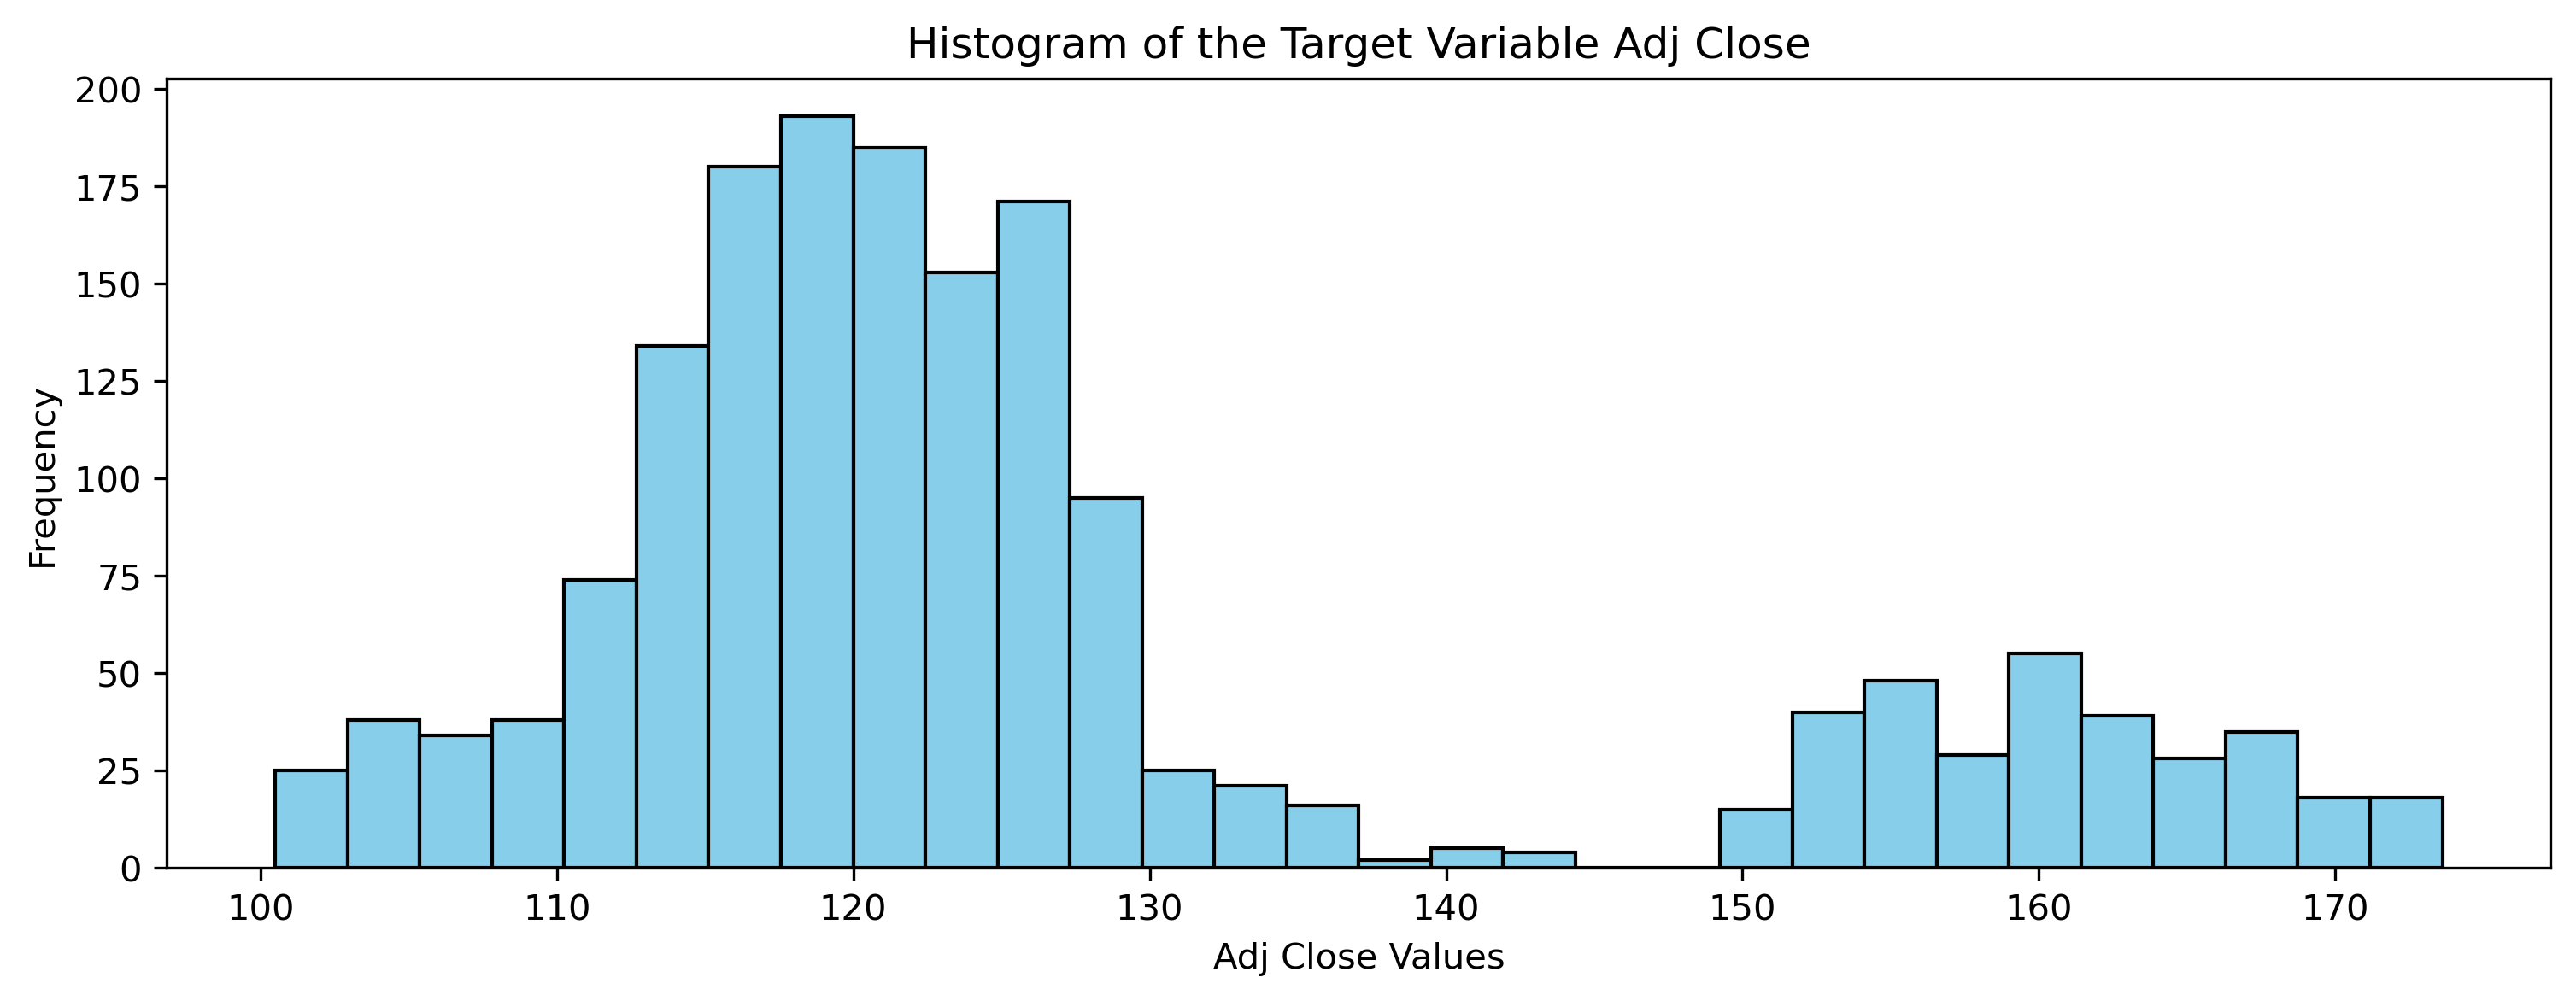

In [6]:
# The target variable is "Adj Close", which is the adjusted closing price of gold ETF
# From the histogram plot, we can see that the Adj Close is bimodal distributed with two peaks around 120 and 160
hist_plot(data,'Adj Close')

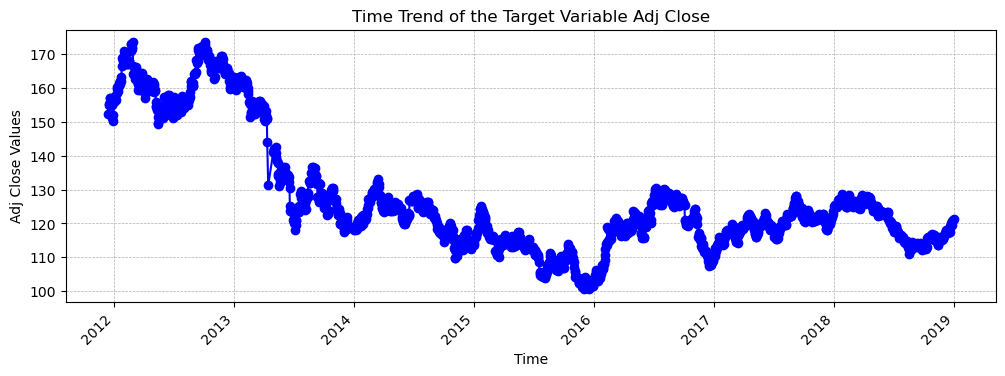

In [7]:
# Convert the date column to datetime type and plot the time series data
# The time trend plot shows the adjusted close prices fluctuates over time, decreasing from around 170 to around 120
data1=convert_datetime(data)
time_series_plot(data1,'Adj Close')

– Do we face missing values / outliers?


<Axes: >

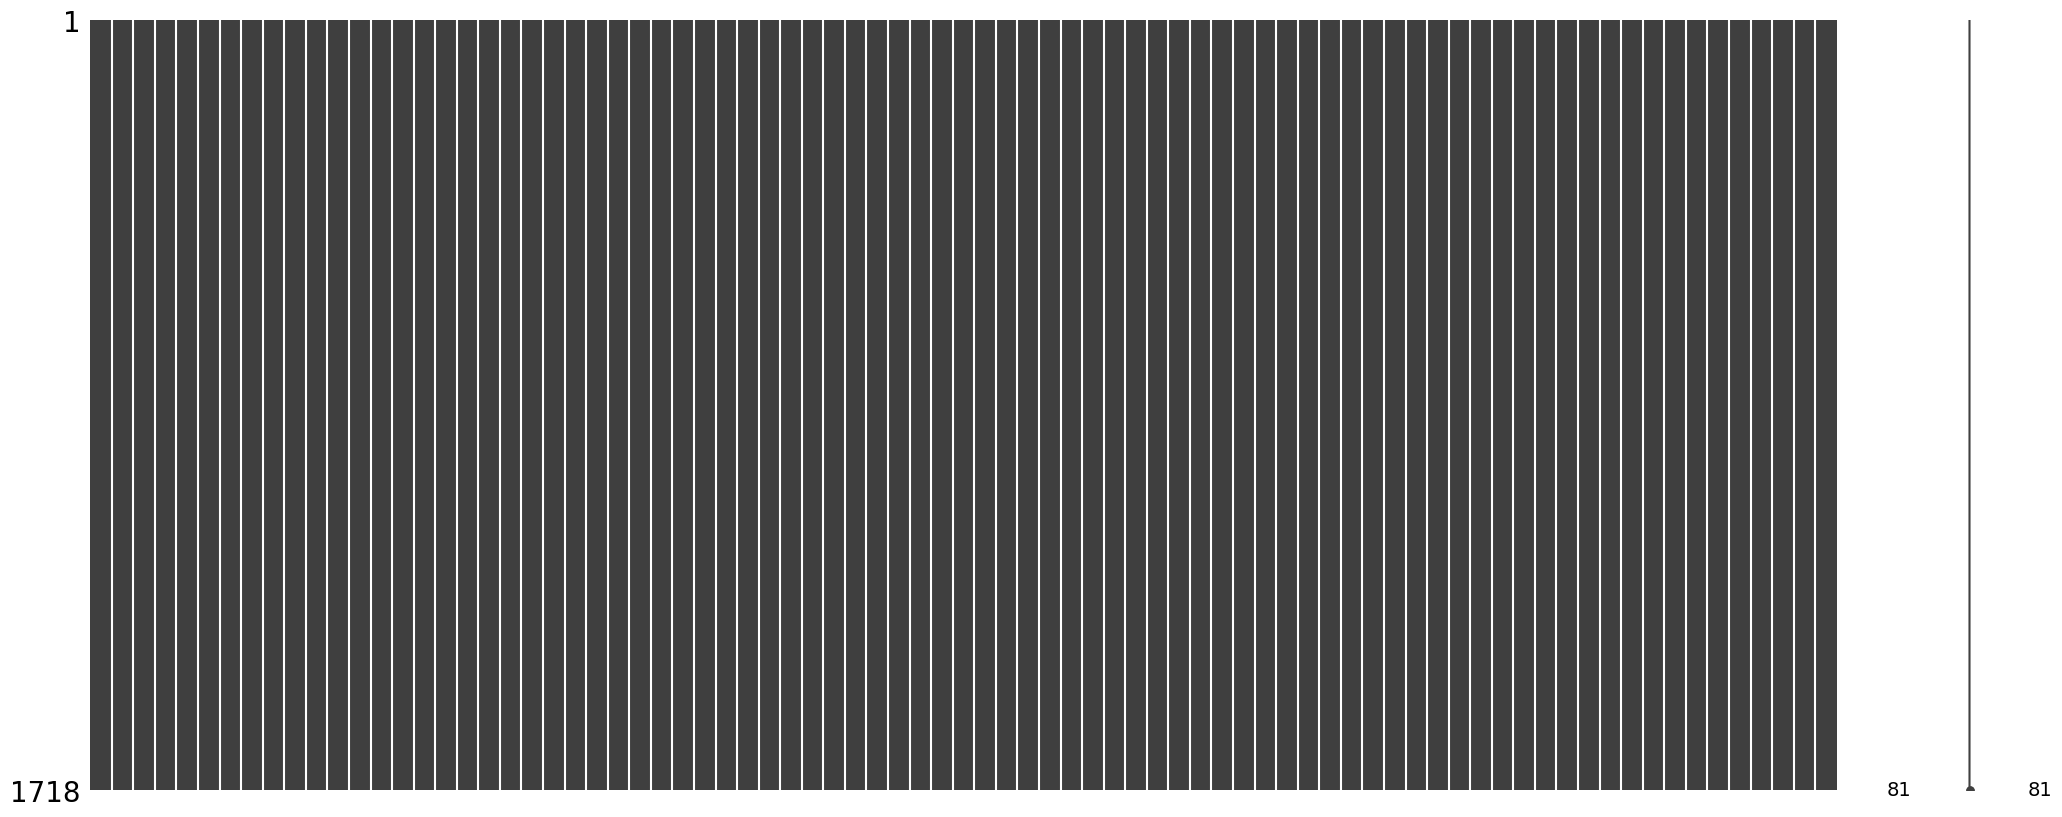

In [8]:
# There is no missing values
msn.matrix(data)

In [9]:
data.isnull().sum().sum()

0

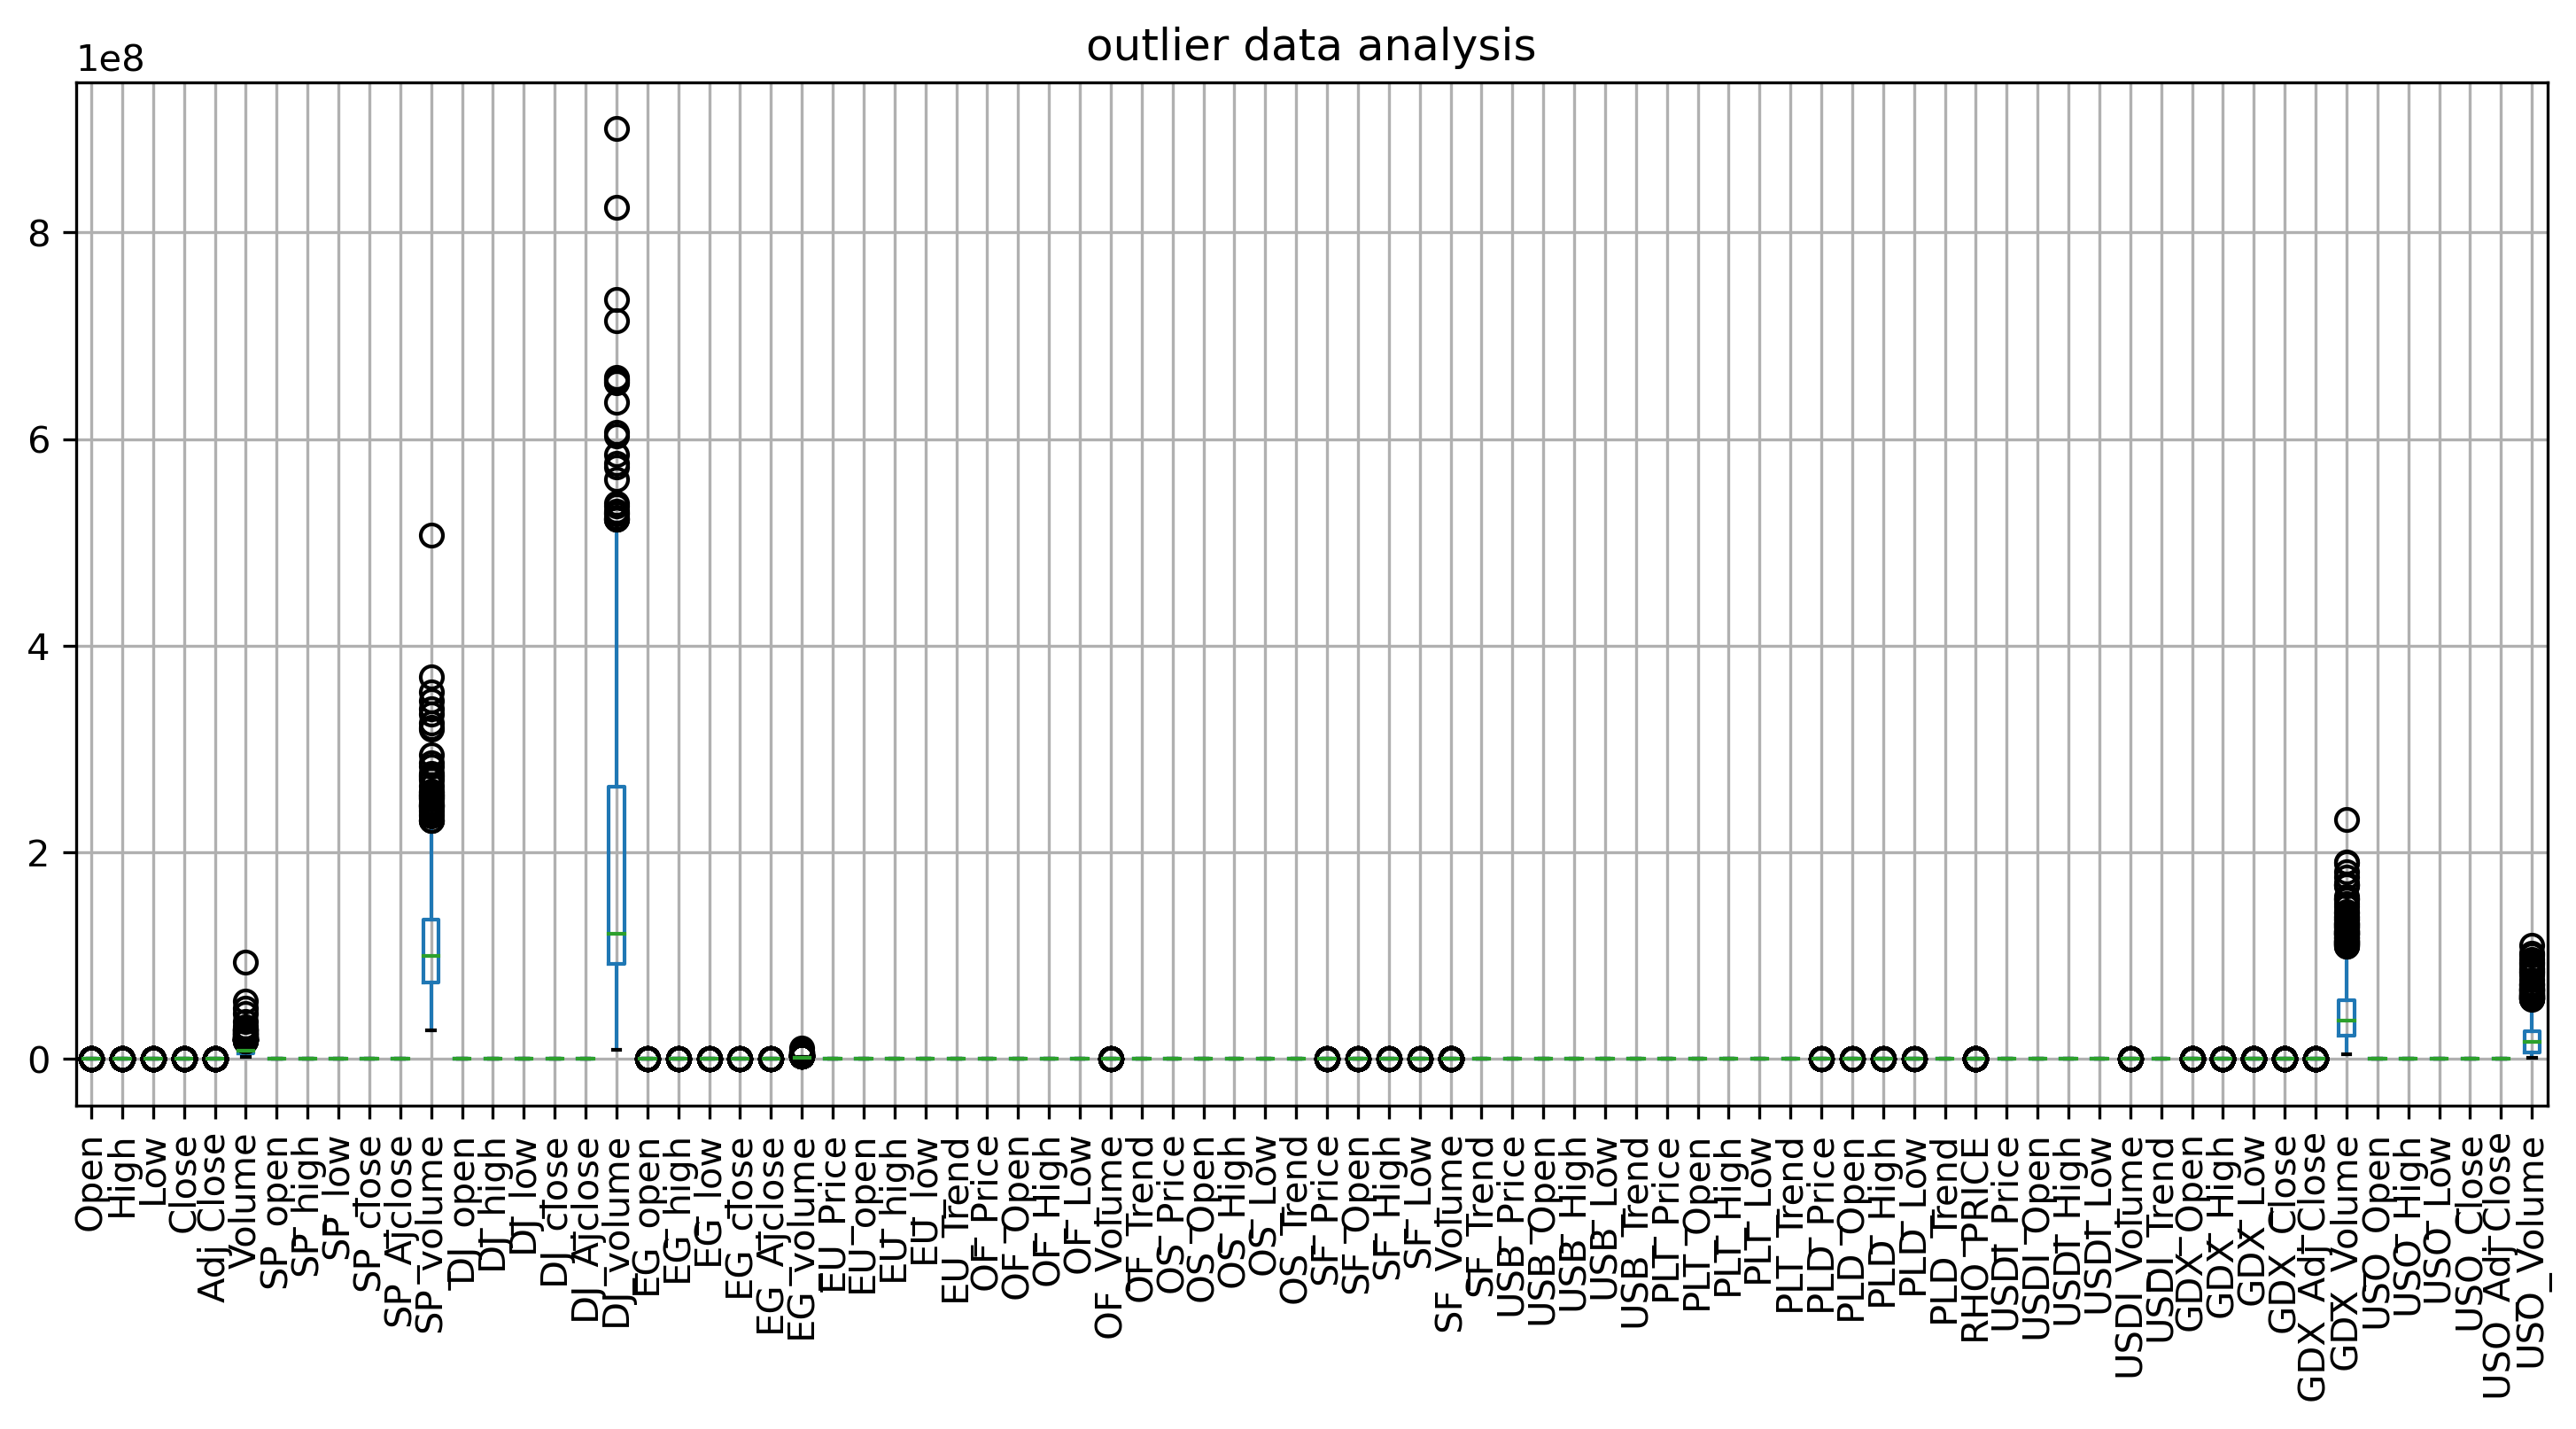

In [10]:
# There are some outliers
data2 = remove_filers_with_boxplot(data1)

– How do specific features correlate with the target variable?


In [11]:
# The correlation between the variables
# It can be seen that some variables such as Open, High, Low, and Close are very highly correlated with Adj Close
corr=data1.corr()
corr

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Open,1.000000,0.999515,0.999442,0.998976,0.998976,0.251921,-0.684314,-0.684597,-0.683464,-0.683998,-0.665788,0.242265,-0.588615,-0.588534,-0.587941,-0.588179,-0.588179,-0.155915,0.863226,0.861273,0.863740,0.862066,0.859143,-0.127269,0.580586,0.579304,0.582948,0.577043,0.010250,0.710348,0.708938,0.711079,0.708038,-0.225405,0.045286,0.630270,0.629795,0.631616,0.628710,0.056485,0.946923,0.946454,0.945632,0.948152,0.708413,0.017132,-0.441423,-0.441780,-0.464759,-0.417975,-0.018419,0.775265,0.774171,0.775528,0.774047,-0.002555,-0.213162,-0.215840,-0.217142,-0.214507,0.018274,0.096399,-0.721133,-0.720350,-0.720013,-0.721968,-0.207064,-0.007063,0.975510,0.975143,0.975479,0.974596,0.974098,-0.514230,0.634872,0.634864,0.634277,0.635138,0.635138,-0.455920
High,0.999515,1.000000,0.999262,0.999535,0.999535,0.261064,-0.688118,-0.688365,-0.687325,-0.687817,-0.669657,0.247883,-0.592459,-0.592376,-0.591864,-0.592072,-0.592072,-0.157978,0.864864,0.863336,0.865556,0.864276,0.861358,-0.124106,0.581787,0.580143,0.584050,0.577891,0.015209,0.711245,0.709720,0.711967,0.708806,-0.225274,0.046764,0.631470,0.630847,0.632808,0.629749,0.058236,0.947434,0.946187,0.945888,0.947901,0.712873,0.023581,-0.443377,-0.443266,-0.466330,-0.419765,-0.021915,0.777601,0.775989,0.777677,0.775923,0.004889,-0.216981,-0.219974,-0.221115,-0.218568,0.022405,0.093272,-0.722573,-0.721454,-0.721134,-0.723371,-0.201262,-0.011713,0.975429,0.975722,0.975650,0.975341,0.974746,-0.508782,0.637101,0.637208,0.636538,0.637483,0.637483,-0.454913
Low,0.999442,0.999262,1.000000,0.999532,0.999532,0.237031,-0.680911,-0.681242,-0.679988,-0.680567,-0.662325,0.235838,-0.585021,-0.585009,-0.584304,-0.584592,-0.584592,-0.153442,0.861282,0.859493,0.862220,0.860614,0.857697,-0.129967,0.580633,0.578906,0.582613,0.576936,0.016249,0.710616,0.709057,0.711224,0.708290,-0.225901,0.047973,0.630436,0.629721,0.631587,0.628832,0.058875,0.947373,0.946032,0.945280,0.948437,0.701648,0.023881,-0.438559,-0.438496,-0.461766,-0.414710,-0.022045,0.774112,0.772421,0.773877,0.772672,0.005959,-0.208824,-0.211947,-0.213075,-0.210420,0.024138,0.098648,-0.720684,-0.719513,-0.719438,-0.721184,-0.212337,-0.013227,0.974725,0.974587,0.975337,0.974568,0.974182,-0.519988,0.633591,0.633623,0.633140,0.633994,0.633994,-0.457628
Close,0.998976,0.999535,0.999532,1.000000,1.000000,0.246778,-0.684618,-0.684904,-0.683750,-0.684284,-0.666071,0.241949,-0.588800,-0.588778,-0.588157,-0.588411,-0.588411,-0.155526,0.862900,0.861479,0.863917,0.862770,0.859850,-0.126586,0.581036,0.579036,0.582969,0.577000,0.019913,0.710693,0.709096,0.711334,0.708266,-0.225436,0.048205,0.630817,0.630046,0.632001,0.629083,0.059510,0.947420,0.945557,0.945203,0.947842,0.706505,0.028100,-0.441347,-0.440822,-0.464116,-0.417352,-0.025933,0.775861,0.773760,0.775481,0.773993,0.011355,-0.213179,-0.216426,-0.217490,-0.214919,0.026536,0.095782,-0.721569,-0.720140,-0.720023,-0.722078,-0.205954,-0.016641,0.974824,0.975255,0.975561,0.975459,0.974980,-0.514616,0.635197,0.635311,0.634732,0.635675,0.635675,-0.456193
Adj Close,0.998976,0.999535,0.999532,1.000000,1.000000,0.246778,-0.684618,-0.684904,-0.683750,-0.684284,-0.666071,0.241949,-0.588800,-0.588778,-0.588157,-0.588411,-0.588411,-0.155526,0.862900,0.861479,0.863917,0.862770,0.859850,-0.126586,0.581036,0.579036,0.582969,

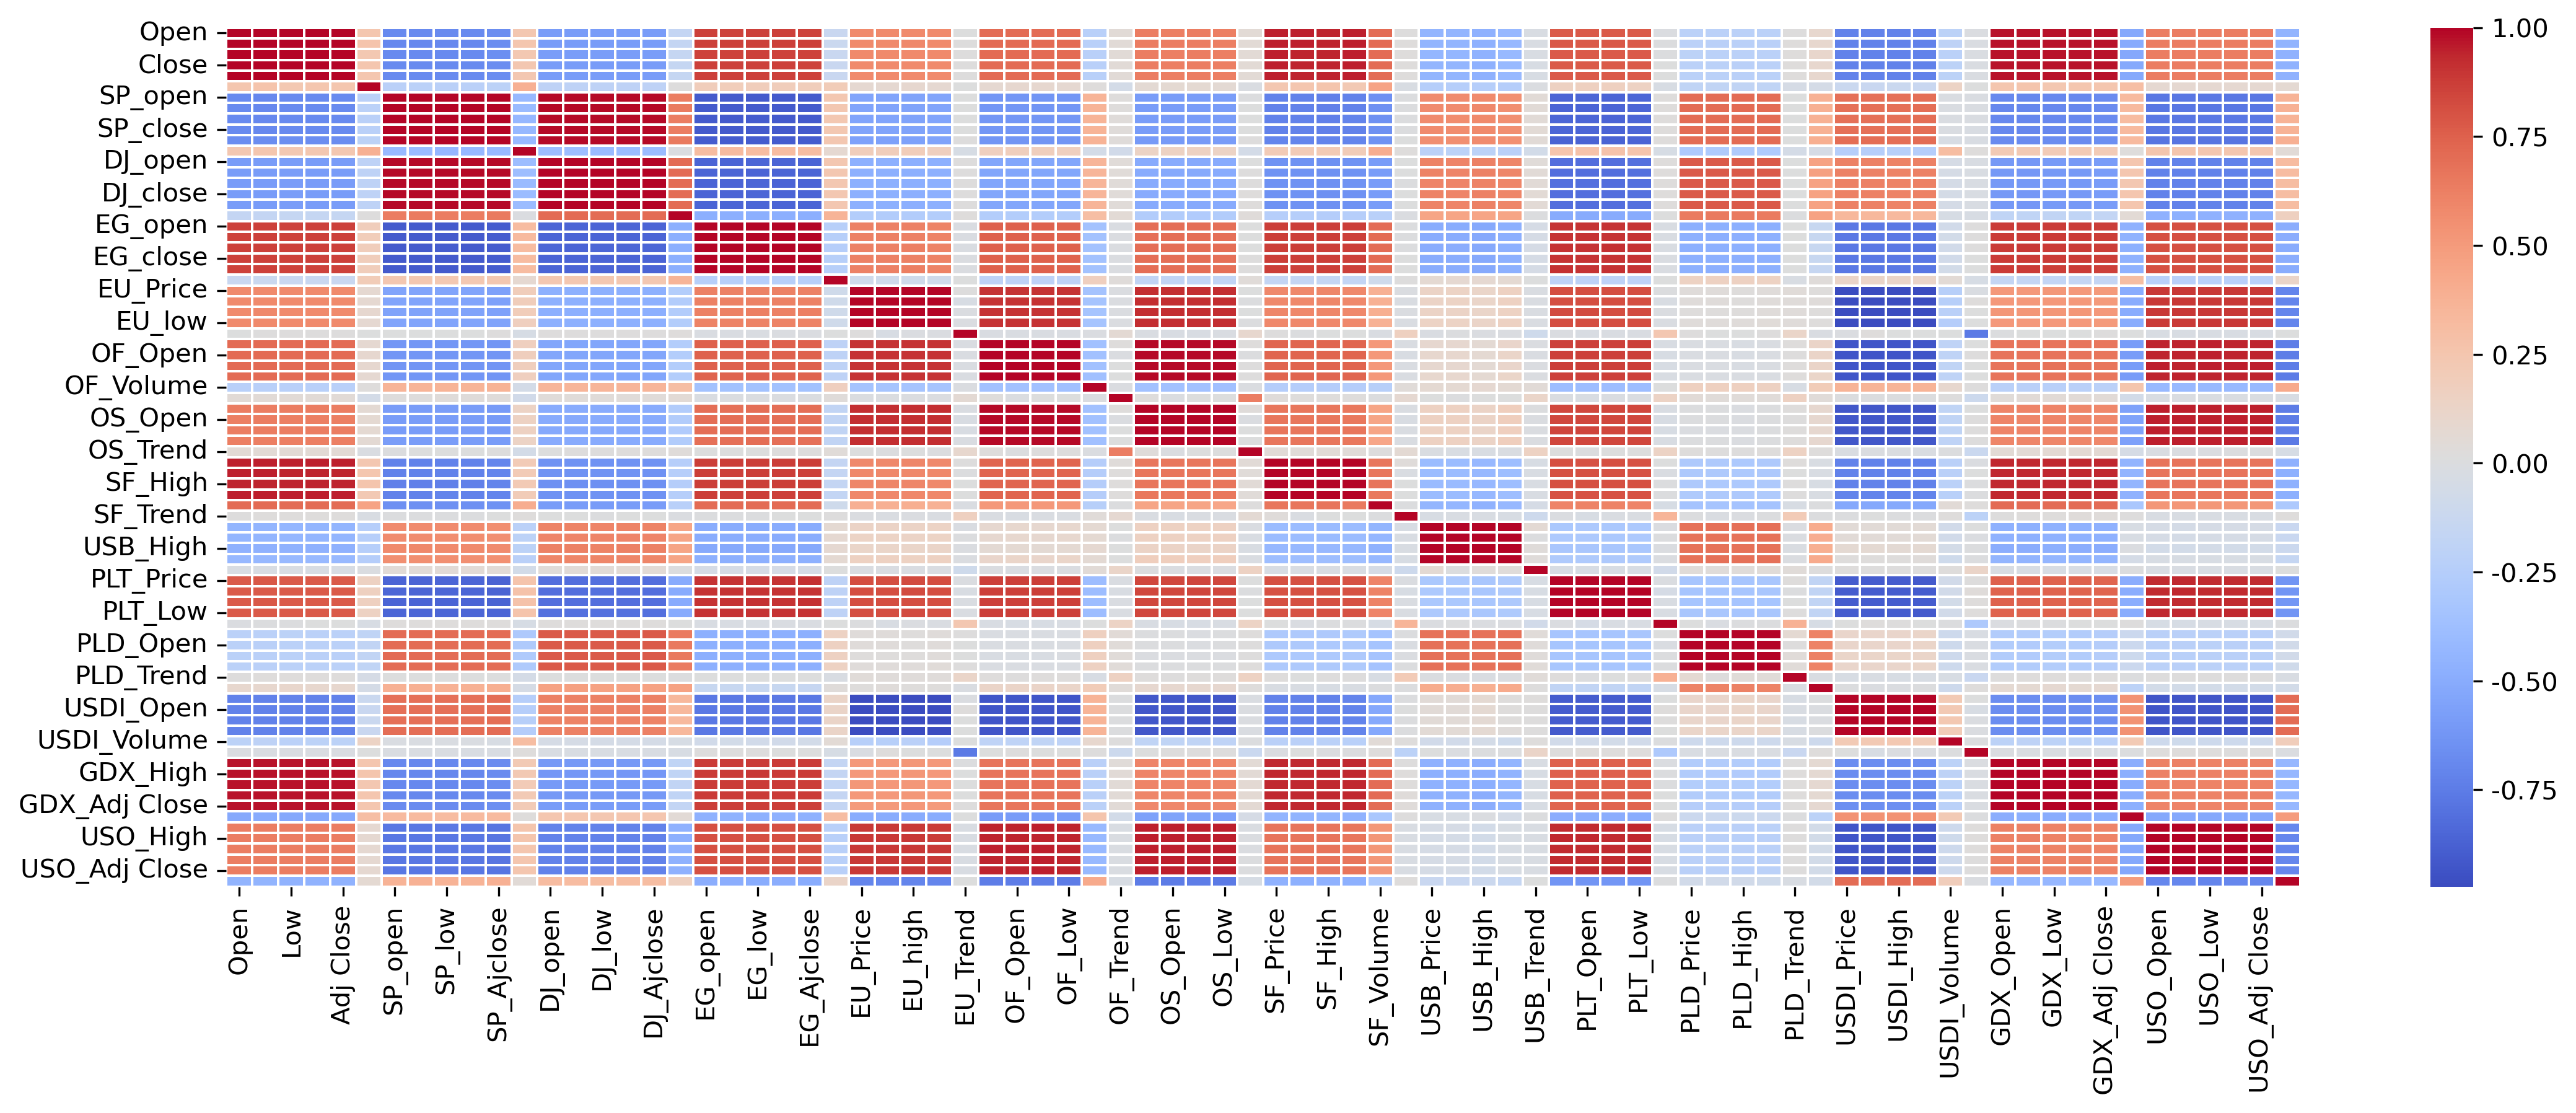

In [12]:
# The heatmap plot of correlation matrix
corr_heatmap(corr)

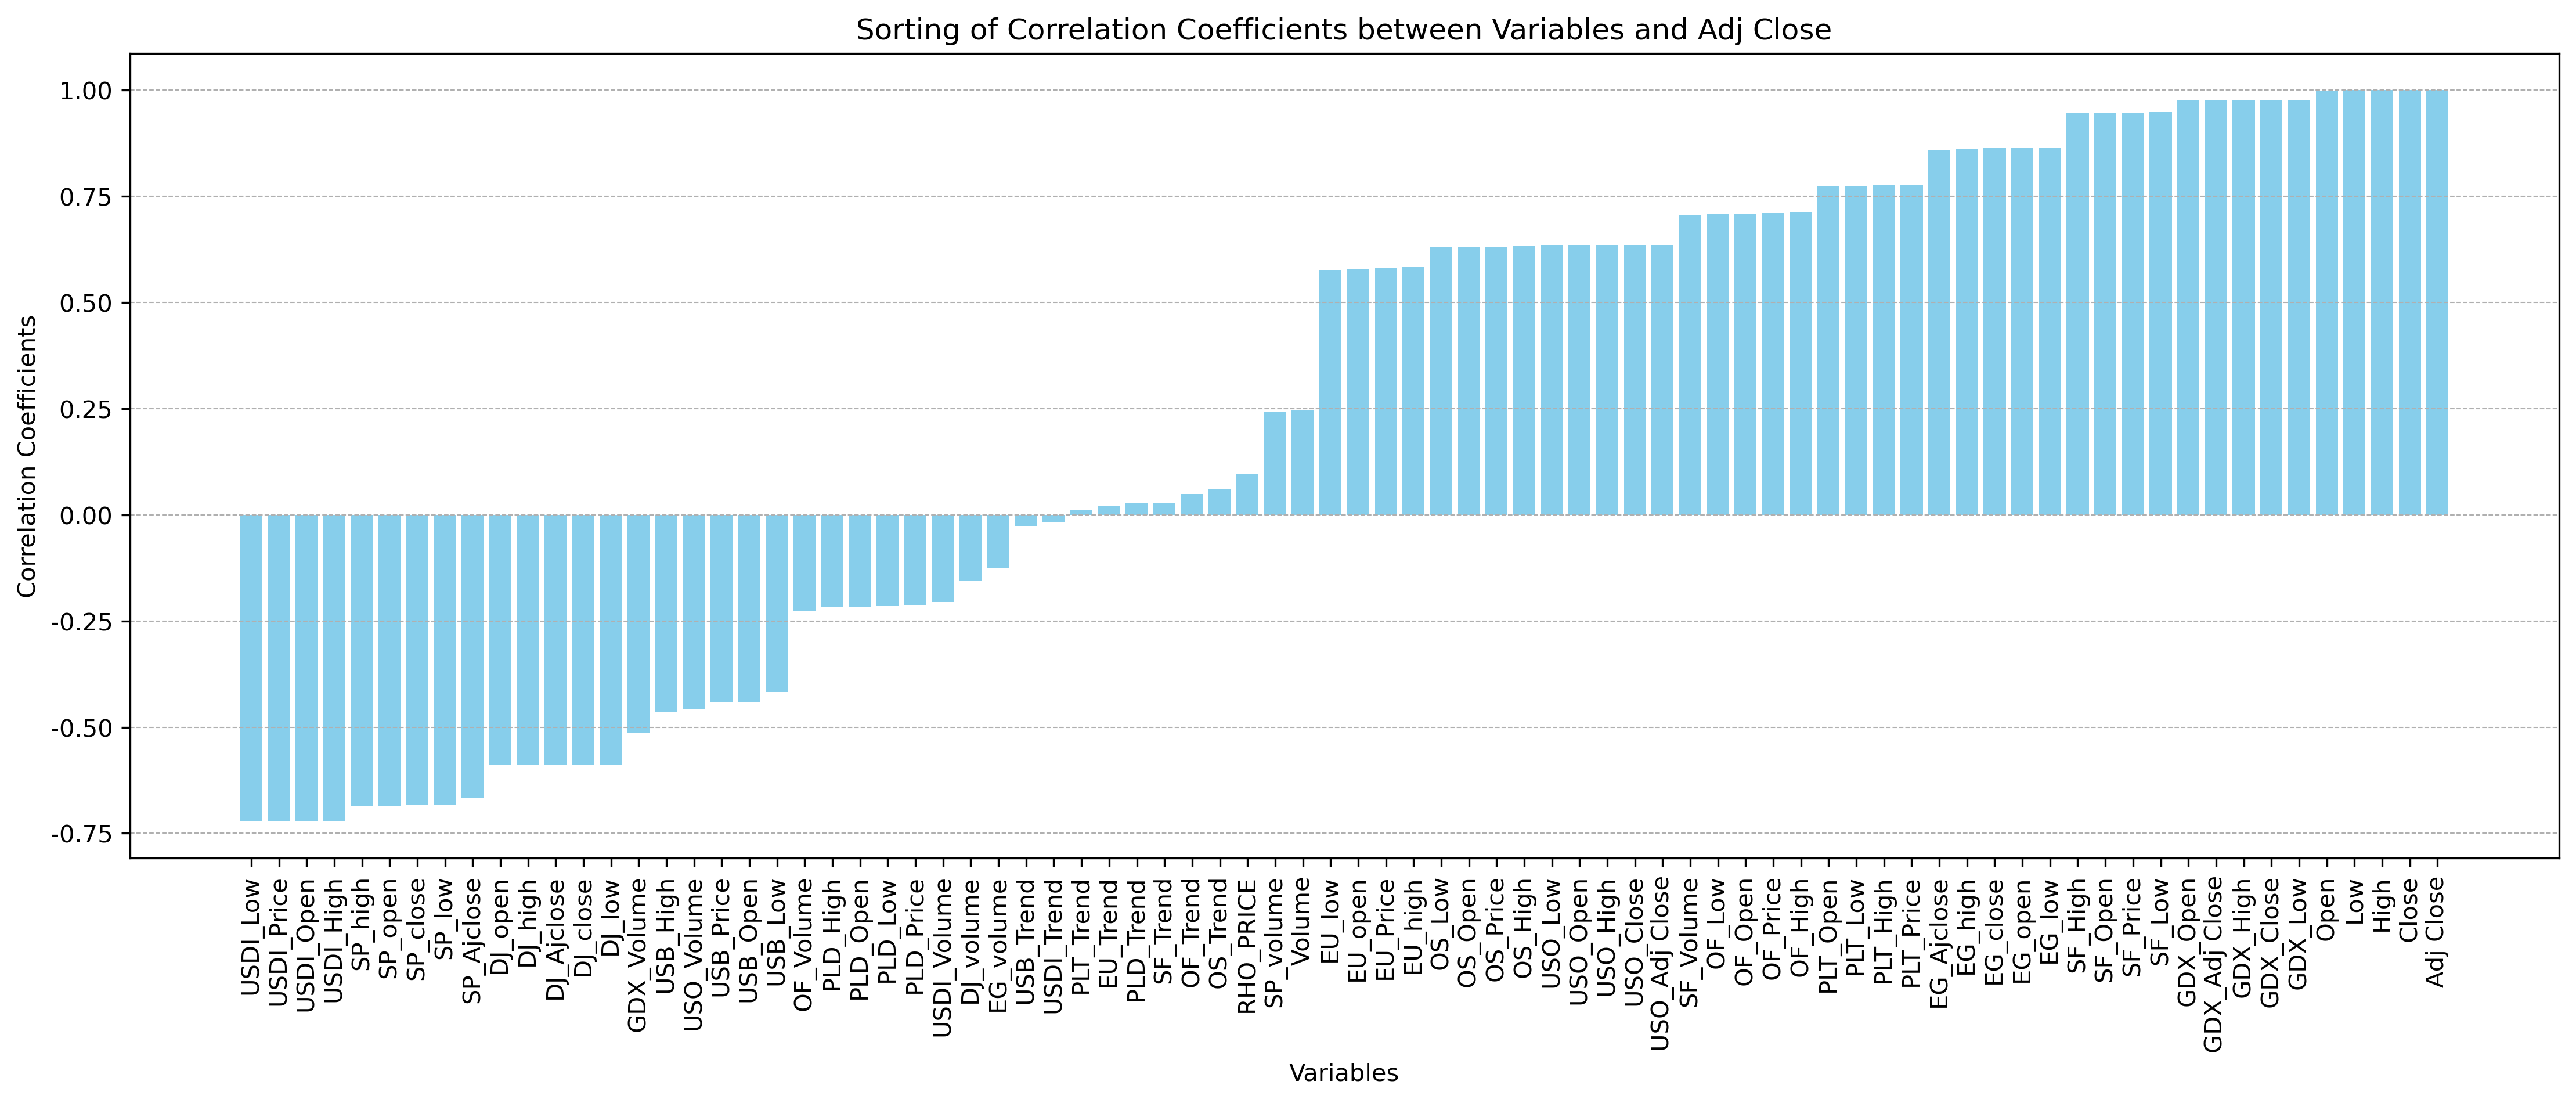

In [13]:
# This is a plot of the correlation coefficients between all other features and Adj Close
sort_corr=sort_corr(corr)

– What features can we use for the specific prediction task?

0.0005
Lasso picked 72 variables and eliminated the other 7 variables
0.25564589381526


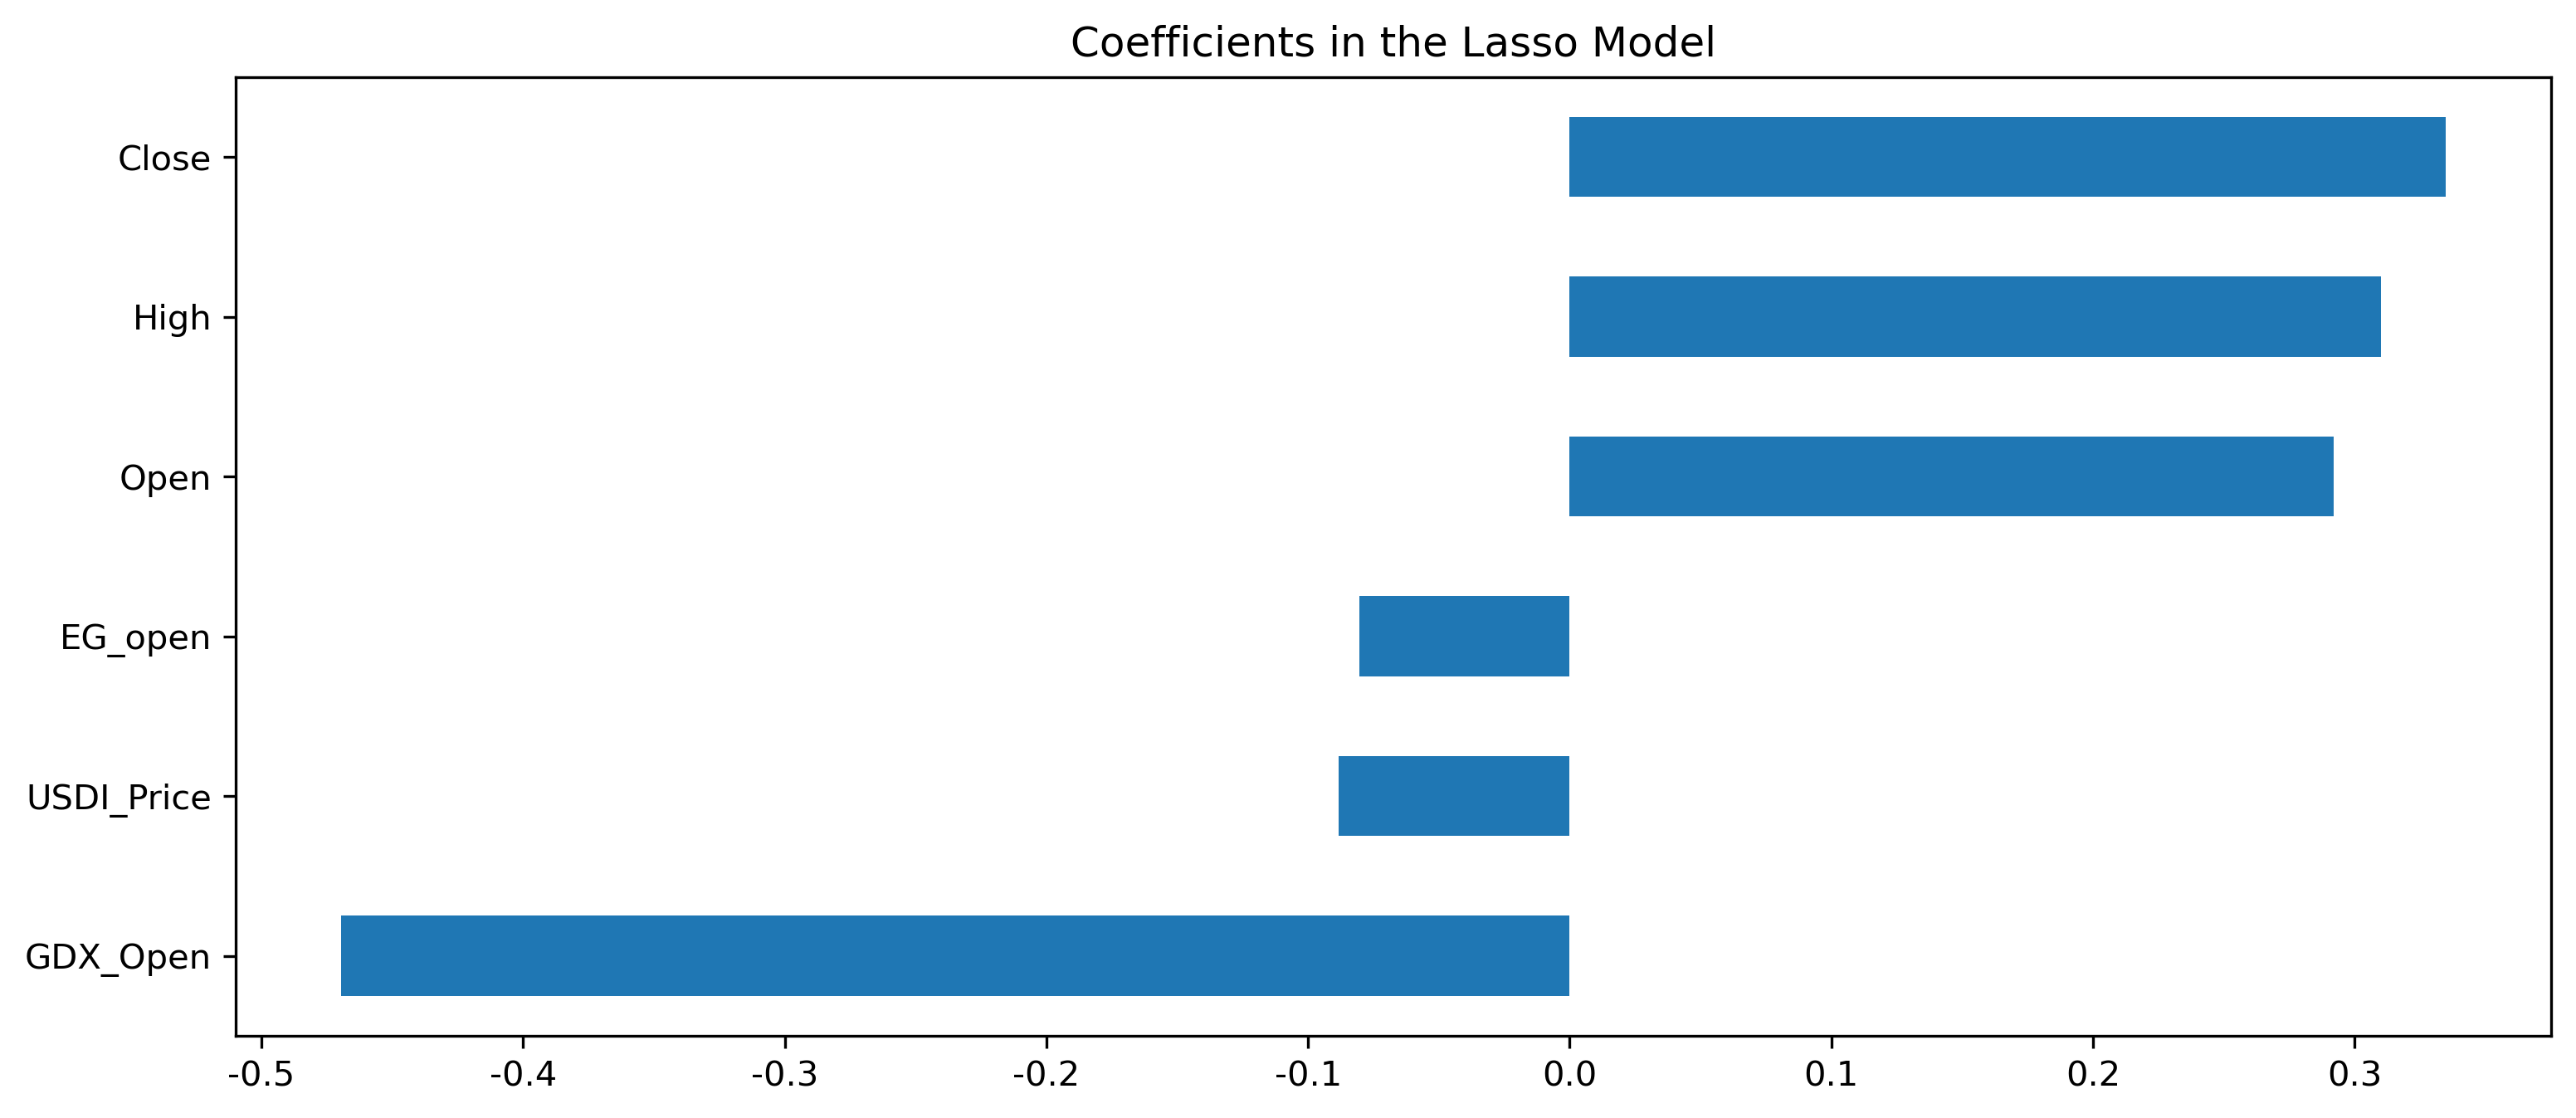

In [14]:
# Use Lasso regression for feature selection and calculate the coefficients
X_train = data1.drop(['Adj Close'], axis=1)
y = data1['Adj Close']
lasso_coef=lasso_features_selection(data1,X_train, y)

In [15]:
# List the columns with zero importance from Lasso Regression (to be deleted)
coef=pd.DataFrame([lasso_coef]).T
coef.index=X_train.columns
coef.columns=['importance']
coef=coef.sort_values(by='importance')
drop_lasso_features=coef[coef['importance']==0].index
print("Drop columns:",drop_lasso_features)

Drop columns: Index(['USB_Price', 'USB_Open', 'EU_open', 'EU_high', 'EU_Price', 'EU_low',
       'USB_Low'],
      dtype='object')


In [16]:
# List the columns with too high correlation (to be deleted)
drop_corr_feature=sort_corr[sort_corr>0.6].index
print("Drop columns:",drop_corr_feature)

Drop columns: Index(['OS_Low', 'OS_Open', 'OS_Price', 'OS_High', 'USO_Low', 'USO_Open',
       'USO_High', 'USO_Close', 'USO_Adj Close', 'SF_Volume', 'OF_Low',
       'OF_Open', 'OF_Price', 'OF_High', 'PLT_Open', 'PLT_Low', 'PLT_High',
       'PLT_Price', 'EG_Ajclose', 'EG_high', 'EG_close', 'EG_open', 'EG_low',
       'SF_High', 'SF_Open', 'SF_Price', 'SF_Low', 'GDX_Open', 'GDX_Adj Close',
       'GDX_High', 'GDX_Close', 'GDX_Low', 'Open', 'Low', 'High', 'Close',
       'Adj Close'],
      dtype='object')


In [17]:
# I have to delete 44 variables in total
drop_features=list(set(list(drop_lasso_features)+list(drop_corr_feature)))
print("Drop features:",len(drop_features), drop_features)

Drop features: 44 ['Low', 'PLT_Open', 'EG_open', 'EG_Ajclose', 'EU_Price', 'USB_Open', 'USO_Low', 'EG_high', 'OS_Price', 'SF_Price', 'GDX_Close', 'OS_High', 'SF_High', 'EG_close', 'OF_High', 'High', 'Adj Close', 'OS_Open', 'SF_Open', 'GDX_Adj Close', 'USO_Open', 'OS_Low', 'EU_high', 'USB_Low', 'OF_Open', 'PLT_Price', 'USB_Price', 'EU_low', 'USO_High', 'GDX_High', 'Close', 'GDX_Open', 'PLT_High', 'GDX_Low', 'OF_Low', 'OF_Price', 'SF_Volume', 'EU_open', 'USO_Adj Close', 'SF_Low', 'Open', 'USO_Close', 'PLT_Low', 'EG_low']


### clean data

In [18]:
# Delete the features I listed in the last step
data3=pd.concat([data1.drop(drop_features, axis=1),y], axis=1)
data3.head()

,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_volume,EU_Trend,OF_Volume,OF_Trend,OS_Trend,SF_Trend,USB_High,USB_Trend,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Volume,USO_Volume,Adj Close
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-15,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,787900,1,14330,1,0,1,1.911,1,0,618.85,614.70,615.00,614.60,1,1425,80.341,80.565,80.630,80.130,22850,0,20605600,12616700,152.330002
2011-12-16,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,896600,1,140080,0,1,0,1.851,0,1,623.65,622.60,623.45,622.30,1,1400,80.249,80.175,80.395,79.935,13150,0,16285400,12578800,155.229996
2011-12-19,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,2096700,0,147880,1,1,0,1.810,0,0,608.80,626.00,630.00,608.60,0,1400,80.207,80.300,80.470,80.125,970,0,15120200,7418200,154.869995
2011-12-20,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,875300,1,170240,1,1,1,1.927,1,1,626.65,622.45,622.45,622.45,1,1400,80.273,80.890,80.940,80.035,22950,1,11644900,10041600,156.979996
2011-12-21,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,837600,0,145090,1,1,0,1.970,1,0,635.90,625.70,641.50,623.80,1,1400,80.350,80.105,80.445,79.550,24140,1,8724300,10728000,157.160004


In [19]:
# Save the prepared dataset to a .parquet file in the data folder 
file_path = 'data/data.parquet'
data3.to_parquet(file_path)
# Read the saved .parquet file and check the head of the data
data4 = pd.read_parquet(file_path)
data4.head()

,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_volume,EU_Trend,OF_Volume,OF_Trend,OS_Trend,SF_Trend,USB_High,USB_Trend,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Volume,USO_Volume,Adj Close
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-15,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,787900,1,14330,1,0,1,1.911,1,0,618.85,614.70,615.00,614.60,1,1425,80.341,80.565,80.630,80.130,22850,0,20605600,12616700,152.330002
2011-12-16,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,896600,1,140080,0,1,0,1.851,0,1,623.65,622.60,623.45,622.30,1,1400,80.249,80.175,80.395,79.935,13150,0,16285400,12578800,155.229996
2011-12-19,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,2096700,0,147880,1,1,0,1.810,0,0,608.80,626.00,630.00,608.60,0,1400,80.207,80.300,80.470,80.125,970,0,15120200,7418200,154.869995
2011-12-20,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,875300,1,170240,1,1,1,1.927,1,1,626.65,622.45,622.45,622.45,1,1400,80.273,80.890,80.940,80.035,22950,1,11644900,10041600,156.979996
2011-12-21,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,837600,0,145090,1,1,0,1.970,1,0,635.90,625.70,641.50,623.80,1,1400,80.350,80.105,80.445,79.550,24140,1,8724300,10728000,157.160004
